# Assignment 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import folium
from folium.plugins import HeatMapWithTime

## Data Wrangling

In [2]:
# Load data

#path1 = "/Users/markusswegmark/Desktop/Visualization/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250204.csv"
#path2 = "/Users/markusswegmark/Desktop/Visualization/Police_Department_Incident_Reports__2018_to_Present_20250204.csv"

path1 = "/Users/mathiaskroismoller/Library/Mobile Documents/com~apple~CloudDocs/Documents/DTU/Kanditat/1. Semester /Social Data Analysis/Exercises/Lecture 1/Data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250204.csv"
path2 = "/Users/mathiaskroismoller/Library/Mobile Documents/com~apple~CloudDocs/Documents/DTU/Kanditat/1. Semester /Social Data Analysis/Exercises/Lecture 1/Data/Police_Department_Incident_Reports__2018_to_Present_20250204.csv"

df_2003 = pd.read_csv(
    path1,
    sep=',')  
df_2018 = pd.read_csv(
    path2,
    sep=',')  

Add "year" column to first dataset

In [3]:
df_2003["year"] = df_2003["Date"].str.extract(r'(\d{4})$').astype(int)

### Merge datasets

First we investigate the categeories in the two datasets

In [4]:
# Print column names for both datasets
print("Columns in df1:")
print(df_2003.columns.tolist())

print("\nColumns in df2:")
print(df_2018.columns.tolist())

# Print unique categories for both datasets
print("\nUnique categories in df1:")
print(df_2003['Category'].unique())

print("\nUnique categories in df2:")
print(df_2018['Incident Category'].unique())

print("\nUnique subcategories in df2:")
print(df_2018['Incident Subcategory'].unique())

Columns in df1:
['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location', 'SF Find Neighborhoods 2 2', 'Current Police Districts 2 2', 'Current Supervisor Districts 2 2', 'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2', 'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2', 'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2', 'DELETE - 2017 Fix It Zones 2 2', 'Civic Center Harm Reduction Project Boundary 2 2', 'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2', 'Fix It Zones as of 2018-02-07 2 2', 'CBD, BID and GBD Boundaries as of 2017 2 2', 'Areas of Vulnerability, 2016 2 2', 'Central Market/Tenderloin Boundary 2 2', 'Central Market/Tenderloin Boundary Polygon - Updated 2 2', 'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2', 'Neighborhoods 2', 'year']

Columns in df2:
['Incident Datetime', 'Incident Date', 'Incident Time', 'I

Now mergeing the datasets based on the catageries that seem to relate

In [5]:
# Load datasets
df1 = df_2003
df2 = df_2018

# Define column mapping for df1, including x and y
column_mapping = {
    'IncidntNum': 'IncidentNumber',
    'Incident Code': 'IncidentCode',
    'Category': 'Category',
    'Descript': 'Subcategory', 
    'Date': 'Date',
    'Time': 'Time',
    'PdDistrict': 'PoliceDistrict',
    'Resolution': 'Resolution',
    'year': 'Year',
    'X': 'Longitude',   
    'Y': 'Latitude'     
}

# Select and rename columns in df1
df1 = df1[list(column_mapping.keys())].rename(columns=column_mapping)

# Select and rename columns in df2 (adding Latitude, Longitude to the list)
df2 = df2[['Incident Number', 'Incident Code', 'Incident Category', 'Incident Subcategory', 
           'Incident Date', 'Incident Time', 'Police District', 'Resolution', 'Incident Year',
           'Latitude', 'Longitude']]
df2.columns = ['IncidentNumber', 'IncidentCode', 'Category', 'Subcategory', 'Date', 
               'Time', 'PoliceDistrict', 'Resolution', 'Year', 'Latitude', 'Longitude']

df1 = df1.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df2 = df2.apply(lambda x: x.str.upper() if x.dtype == "object" else x)

# Define the category mapping
category_mapping = {
    "LARCENY/THEFT": {"Category": ["LARCENY THEFT"], "Subcategory": ["LARCENY THEFT - OTHER", "LARCENY - FROM VEHICLE", "LARCENY THEFT - BICYCLE", "LARCENY THEFT - SHOPLIFTING", "LARCENY THEFT - FROM BUILDING", "LARCENY THEFT - PICKPOCKET", "LARCENY - AUTO PARTS", "LARCENY THEFT - PURSE SNATCH"]},
    "VEHICLE THEFT": {"Category": ["MOTOR VEHICLE THEFT"], "Subcategory": ["MOTOR VEHICLE THEFT (ATTEMPTED)"]},
    "STOLEN PROPERTY": {"Category": ["STOLEN PROPERTY"], "Subcategory": []},
    "DRUG/NARCOTIC": {"Category": ["DRUG VIOLATION", "DRUG OFFENSE"], "Subcategory": []},
    "ASSAULT": {"Category": ["ASSAULT"], "Subcategory": ["SIMPLE ASSAULT", "AGGRAVATED ASSAULT"]},
    "ROBBERY": {"Category": ["ROBBERY"], "Subcategory": ["ROBBERY - CARJACKING", "ROBBERY - OTHER", "ROBBERY - COMMERCIAL", "ROBBERY - STREET", "ROBBERY - RESIDENTIAL"]},
    "BURGLARY": {"Category": ["BURGLARY"], "Subcategory": ["BURGLARY - OTHER", "BURGLARY - COMMERCIAL", "BURGLARY - RESIDENTIAL", "BURGLARY - HOT PROWL"]},
    "VANDALISM": {"Category": ["VANDALISM", "MALICIOUS MISCHIEF"], "Subcategory": []},
    "WEAPON LAWS": {"Category": ["WEAPONS CARRYING ETC", "WEAPONS OFFENSE", "WEAPONS OFFENCE"], "Subcategory": []},
    "SEX OFFENSES, FORCIBLE": {"Category": ["RAPE"], "Subcategory": ["RAPE - ATTEMPTED"]},
    "SEX OFFENSES, NON FORCIBLE": {"Category": ["SEX OFFENSE"], "Subcategory": []},
    "PROSTITUTION": {"Category": ["PROSTITUTION"], "Subcategory": []},
    "DRIVING UNDER THE INFLUENCE": {"Category": ["TRAFFIC VIOLATION ARREST"], "Subcategory": []},
    "KIDNAPPING": {"Category": ["KIDNAPPING"], "Subcategory": []},
    "EXTORTION": {"Category": ["EXTORTION-BLACKMAIL"], "Subcategory": []},
    "GAMBLING": {"Category": ["GAMBLING"], "Subcategory": []},
    "BRIBERY": {"Category": ["BRIBERY"], "Subcategory": []},
    "FRAUD/FINANCIAL CRIME": {"Category": ["FRAUD", "FORGERY AND COUNTERFEITING", "BAD CHECKS", "EMBEZZLEMENT"], "Subcategory": []},
    "LOITERING": {"Category": ["LOITERING"], "Subcategory": []},
    "DRUNKENNESS": {"Category": ["LIQUOR LAWS"], "Subcategory": ["LIQUOR LAW VIOLATION"]},
    "DISORDERLY CONDUCT": {"Category": ["DISORDERLY CONDUCT"], "Subcategory": []},
    "TRESPASS": {"Category": ["SUSPICIOUS OCC", "SUSPICIOUS"], "Subcategory": ["TRESPASS"]},
    "HOMICIDE": {"Category": ["HOMICIDE"], "Subcategory": ["MANSLAUGHTER", "HOMICIDE - EXCUSABLE"]},
    "SUICIDE": {"Category": ["SUICIDE"], "Subcategory": []},
    "MISSING PERSON": {"Category": ["MISSING PERSON"], "Subcategory": ["MISSING ADULT"]},
    "TRAFFIC INCIDENT": {"Category": ["TRAFFIC COLLISION"], "Subcategory": ["TRAFFIC COLLISION - HIT & RUN"]},
    "HUMAN TRAFFICKING": {"Category": ["HUMAN TRAFFICKING, COMMERCIAL SEX ACTS", "HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS", "HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE", "HUMAN TRAFFICKING, INVOLUNTARY SERVITUDE"], "Subcategory": []},
    "OFFENSES AGAINST FAMILY & CHILDREN": {"Category": ["OFFENCES AGAINST THE FAMILY AND CHILDREN"], "Subcategory": []},
    "OTHER OFFENSES": {"Category": ["OTHER OFFENSES", "OTHER", "OTHER MISCELLANEOUS", "CASE CLOSURE", "CIVIL SIDEWALKS"], "Subcategory": []},
    "NON-CRIMINAL": {"Category": ["NON-CRIMINAL"], "Subcategory": ["COURTESY REPORT"]},
}

# Function to clean and map categories
def map_category(row):
    category = row['Category'].upper().strip() if pd.notna(row['Category']) else ""
    subcategory = row['Subcategory'].upper().strip() if pd.notna(row['Subcategory']) else ""

    for target, mapping in category_mapping.items():
        if category in mapping["Category"] or subcategory in mapping["Subcategory"]:
            return target
    
    return category if category else "UNKNOWN"

# Apply category mapping to both datasets
df1['Category'] = df1.apply(map_category, axis=1)
df2['Category'] = df2.apply(map_category, axis=1)

# Ensure 'Date' is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

# Merge datasets
df = pd.concat([df1, df2], ignore_index=True).dropna()

# Drop duplicated
df = df.drop_duplicates(subset=['IncidentNumber', 'Date'])

# Remove year 2025 since it's not complete
df = df[df['Year'] != 2025]

## Investigate drug crimes

In [6]:
# Filter only PROSTITUTION crimes
df_drugs = df[df['Category'] == 'DRUG/NARCOTIC'].copy()

# Remove rows with invalid lat/long (e.g., missing, 0, or out of SF range)
df_drugs = df_drugs.dropna(subset=['Latitude', 'Longitude'])
df_drugs = df_drugs[(df_drugs['Latitude'].between(37.70, 37.85)) & 
                  (df_drugs['Longitude'].between(-122.53, -122.35))]

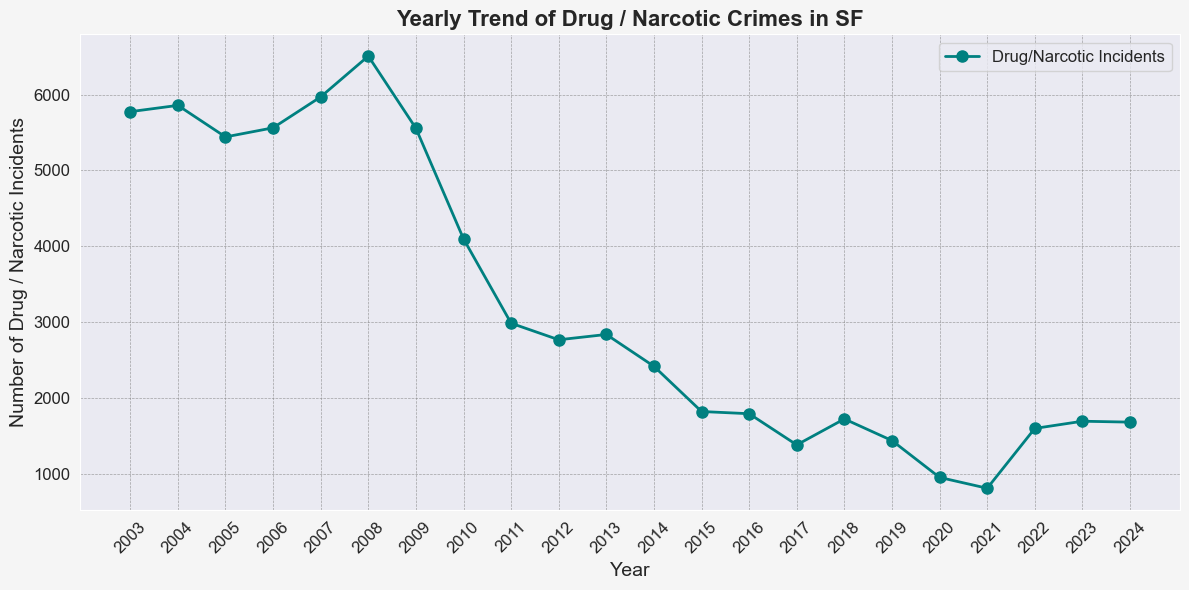

In [7]:
df_drugs['Year'] = df_drugs['Date'].dt.year
yearly_counts = df_drugs.groupby('Year').size().reset_index(name='Count')

yearly_counts = yearly_counts[yearly_counts['Year'] != 2025]

# 2) Plot
plt.figure(figsize=(12, 6), facecolor='whitesmoke')  # Set a light background color
plt.plot(yearly_counts['Year'], yearly_counts['Count'], marker='o', linestyle='-', color='teal', markersize=8, linewidth=2, label='Drug/Narcotic Incidents')
plt.title("Yearly Trend of Drug / Narcotic Crimes in SF", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Drug / Narcotic Incidents", fontsize=14)
plt.xticks(yearly_counts['Year'], rotation=45, fontsize=12)  # Set x-ticks to show each year diagonally
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Lighter grid lines
plt.legend(fontsize=12)  # Add legend
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig("drug_narcotic_crimes_per_year.png")
plt.show()

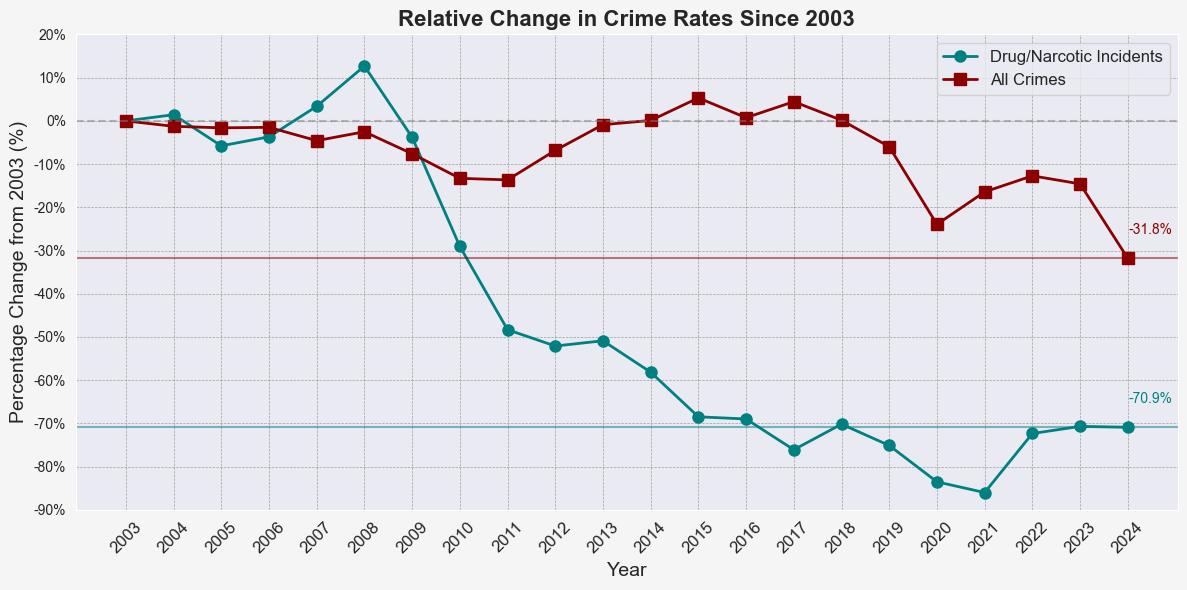


Change from 2003 to latest year:
Drug Crimes: -70.9%
All Crimes: -31.8%
Total Decrease in Drug Crimes: -70.9%
Total Decrease in All Crimes: -31.8%


In [8]:
# Calculate yearly counts for drug crimes
df_drugs['Year'] = df_drugs['Date'].dt.year
drug_yearly_counts = df_drugs.groupby('Year').size().reset_index(name='Drug_Count')
drug_yearly_counts = drug_yearly_counts[drug_yearly_counts['Year'] != 2025]
drug_yearly_count_2003 = drug_yearly_counts[drug_yearly_counts['Year'] == 2003]

# Calculate yearly counts for all crimes
df['Year'] = df['Date'].dt.year
all_yearly_counts = df.groupby('Year').size().reset_index(name='All_Count')
all_yearly_counts = all_yearly_counts[all_yearly_counts['Year'] != 2025]
all_yearly_count_2003 = all_yearly_counts[all_yearly_counts['Year'] == 2003]

# Calculate percentage change from 2003 baseline
drug_baseline = drug_yearly_counts.loc[drug_yearly_counts['Year'] == 2003, 'Drug_Count'].values[0]
all_baseline = all_yearly_counts.loc[all_yearly_counts['Year'] == 2003, 'All_Count'].values[0]

drug_yearly_counts['Percent_Change'] = (drug_yearly_counts['Drug_Count'] / drug_baseline - 1) * 100
all_yearly_counts['Percent_Change'] = (all_yearly_counts['All_Count'] / all_baseline - 1) * 100


# Create the plot
plt.figure(figsize=(12, 6), facecolor='whitesmoke')

# Plot both lines
plt.plot(drug_yearly_counts['Year'], drug_yearly_counts['Percent_Change'], 
         marker='o', linestyle='-', color='teal', markersize=8, linewidth=2, 
         label='Drug/Narcotic Incidents')
plt.plot(all_yearly_counts['Year'], all_yearly_counts['Percent_Change'], 
         marker='s', linestyle='-', color='darkred', markersize=8, linewidth=2, 
         label='All Crimes')

## Add labels for initial values (2003) with thousand separators
#plt.annotate(f'Drug crimes in 2003: {drug_yearly_count_2003["Drug_Count"].values[0]:,}',
#            xy=(2003, 0),
#            xytext=(2006, -10),
#            ha='right',
#            va='top',
#            color='teal',
#            fontsize=10)
#
#plt.annotate(f'Total crimes in 2003: {all_yearly_count_2003["All_Count"].values[0]:,}',
#            xy=(2005, 0),
#            xytext=(2006.4, -17),
#            ha='right',
#            va='top',
#            color='darkred',
#            fontsize=10)

# Add horizontal line at 0% change
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# Add horizontal lines to show total decrease
latest_year = drug_yearly_counts['Year'].max()
drug_change = drug_yearly_counts.loc[drug_yearly_counts['Year'] == latest_year, 'Percent_Change'].values[0]
all_change = all_yearly_counts.loc[all_yearly_counts['Year'] == latest_year, 'Percent_Change'].values[0]

plt.axhline(y=drug_change, color='teal', linestyle='-', alpha=0.5)
plt.axhline(y=all_change, color='darkred', linestyle='-', alpha=0.5)

# Add labels for final total decrease with thousand separators
plt.annotate(f'{drug_change:.1f}%',
            xy=(latest_year, drug_change),
            xytext=(latest_year + 0.01, drug_change + 5),
            ha='left',
            va='bottom',
            color='teal',
            fontsize=10)

plt.annotate(f'{all_change:.1f}%',
            xy=(latest_year, all_change),
            xytext=(latest_year + 0.01, all_change + 5),
            ha='left',
            va='bottom',
            color='darkred',
            fontsize=10)

# Customize the plot
plt.title("Relative Change in Crime Rates Since 2003", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage Change from 2003 (%)", fontsize=14)
plt.xticks(drug_yearly_counts['Year'], rotation=45, fontsize=12)
plt.ylim(-90, 20)  # Set y-axis limits
plt.yticks(np.arange(-90, 21, 10))  # Set y-axis ticks every 10%
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}%'))

# Add legend
plt.legend(fontsize=12, loc='upper right')

# Adjust layout and display
plt.tight_layout()
plt.savefig("crime_trends_comparison.png")
plt.show()


# Print some statistics
print("\nChange from 2003 to latest year:")
print(f"Drug Crimes: {drug_change:.1f}%")
print(f"All Crimes: {all_change:.1f}%")

# Calculate and display total decrease from 2003 to the latest year
total_decrease_drug = drug_change - 0
total_decrease_all = all_change - 0

print(f"Total Decrease in Drug Crimes: {total_decrease_drug:.1f}%")
print(f"Total Decrease in All Crimes: {total_decrease_all:.1f}%")

In [9]:
print(drug_yearly_count_2003['Drug_Count'].values[0])

5775


### Map over the SF Police Disstricts 
Before looking at our data on the map we look at the actual placement of the individual PD's:
![Image](https://lh4.googleusercontent.com/-SVEsrsxL318/VKCIq3U8lfI/AAAAAAAAbug/REilUPI6NxI/s960/SFPDdistricts2.jpg)

In [10]:
# Group the prostitution crimes by Year
year_groups = df_drugs.groupby("Year")

heatmap_data = []
time_labels = []

# For each year collect ["Latitude", "Longitude"] pairs
for year, group in year_groups:
    if year == 2025:  # Skip the year 2025
        continue
    lat_lon_pairs = group[["Latitude", "Longitude"]].values.tolist()
    heatmap_data.append(lat_lon_pairs)
    time_labels.append(str(year))  
    
# Initialize Folium map around SF
m = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

# Add a time-lapse heatmap
HeatMapWithTime(
    data=heatmap_data,
    index=time_labels,
    radius=15,       
    auto_play=True, 
    max_opacity=0.7  
).add_to(m)

# Save or display
m.save("drug_n_narcotics_heatmap_by_year.html")
m

Looking at this heatmap we see that there are two main hotspots that stay more or less the same over the years. The first one is located in the "Mission" district and the other is on the intersection between the three districts "Northern", "Tenderloin" & "Central". 

This explains why we saw by far the most repports in "Mission" and a smaller but still great amount of reports from "Northern", "Tenderloin" & "Central". 

We see that over the years the general prostitution has gone down. The "northern hotspot" has basically disappeared and (as we can also see in the "Percentage of Prostitution Crimes by District (Yearly)" graf) from 2023, 85% or more of the reported prostitution came from "Mission".

# Time and place correlation map

In [11]:
#!/usr/bin/env python3

import numpy as np
import pandas as pd

from bokeh.plotting import figure, output_file, save
from bokeh.models import (
    ColumnDataSource, 
    LinearColorMapper, 
    ColorBar,
    Select,
    CustomJS
)
from bokeh.layouts import column
from bokeh.transform import transform


# 1) LOAD / PREP YOUR DATA

# If df['Date'] is already datetime:
df['Date'] = pd.to_datetime(df['Date'])  

# If df['Time'] is in "HH:MM" or "HH:MM:SS" format:
df['Time'] = df['Time'].astype(str) + ':00'
df['Time'] = pd.to_timedelta(df['Time'], errors='raise')

# Now just add:
df['DateTime'] = df['Date'] + df['Time']

# Then extract day of week, hour, etc.
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Hour'] = df['DateTime'].dt.hour
df['HourOfWeek'] = df['DayOfWeek'] * 24 + df['Hour']

focus_crimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY',
    'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT',
    'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
])

drug_crime = 'DRUG/NARCOTIC'

df_sf = df[
    (df["Longitude"] > -122.55) & (df["Longitude"] < -122.33) &
    (df["Latitude"]  > 37.68)   & (df["Latitude"]  < 37.85)   &
    (df["Category"].isin(focus_crimes))
].copy()

lat_step = 0.0009
lon_step = 0.0011

lat_min, lat_max = df_sf["Latitude"].min(),  df_sf["Latitude"].max()
lon_min, lon_max = df_sf["Longitude"].min(), df_sf["Longitude"].max()

lat_edges = np.arange(lat_min, lat_max + lat_step, lat_step)
lon_edges = np.arange(lon_min, lon_max + lon_step, lon_step)

df_sf["lat_bin"] = pd.cut(
    df_sf["Latitude"], bins=lat_edges, labels=False, include_lowest=True
)
df_sf["lon_bin"] = pd.cut(
    df_sf["Longitude"], bins=lon_edges, labels=False, include_lowest=True
)

# 2) GROUP & PIVOT -> 0/1 PRESENCE

grouped = (
    df_sf
    .groupby(["lat_bin", "lon_bin", "HourOfWeek", "Category"])
    .size()
    .unstack(fill_value=0)
)

# Ensure all focus crimes appear as columns
for c in focus_crimes:
    if c not in grouped.columns:
        grouped[c] = 0

# Convert counts to 0/1 presence
for c in focus_crimes:
    grouped[c] = (grouped[c] > 0).astype(int)

grouped.reset_index(inplace=True)  


# 3) FUNCTION to compute CO-OCCURRENCE for a crime vs DRUG/NARCOTIC

def cooccurrence_data(compare_crime):
    """Return a DataFrame with lat_mid, lon_mid, co_occ_hours
       for DRUG/NARCOTIC vs compare_crime
       summing how many hours had both crimes in each bin."""
    temp = grouped.copy()
    temp["co_occ_hour"] = temp[drug_crime] * temp[compare_crime]
    df_agg = (
        temp
        .groupby(["lat_bin", "lon_bin"])["co_occ_hour"]
        .sum()
        .reset_index()
        .rename(columns={"co_occ_hour": "co_occ_hours"})
    )
    df_agg["lat_mid"] = lat_edges[df_agg["lat_bin"]] + (lat_step / 2)
    df_agg["lon_mid"] = lon_edges[df_agg["lon_bin"]] + (lon_step / 2)
    return df_agg


# 4) PRECOMPUTE co_occ FOR EACH CRIME & FIND GLOBAL MAX


other_crimes = sorted(list(focus_crimes - {drug_crime}))
co_occ_dict = {}
global_max = 0

for crimeB in other_crimes:
    df_agg = cooccurrence_data(crimeB)
    m = df_agg["co_occ_hours"].max()
    global_max = max(global_max, m)
    co_occ_dict[crimeB] = df_agg

# 5) ALSO COMPUTE CORRELATION (presence-based) for each crime vs drug
#    So we can produce a sorted list to paste in index.md

presence_drug = grouped[drug_crime].values  # 0/1 for all (hour+bin) combos

correlation_dict = {}
for crimeB in other_crimes:
    presence_cmp = grouped[crimeB].values
    # Pearson r
    r = np.corrcoef(presence_drug, presence_cmp)[0,1]
    if np.isnan(r):
        r = 0.0
    correlation_dict[crimeB] = r

# Create a sorted list of (crime, correlation) descending
sorted_correlations = sorted(
    correlation_dict.items(),
    key=lambda x: x[1],
    reverse=True
)

# 6) BUILD BOKEH FIGURE (WHITE BACKGROUND, BLACK FONTS)

# We'll pick first crime as initial
initial_crime = other_crimes[0]
initial_df = co_occ_dict[initial_crime]

# A) Figure
p = figure(
    title=f"Co-occurrence: {drug_crime} & {initial_crime}",
    width=700,
    height=600,
    x_range=(lon_min, lon_max),
    y_range=(lat_min, lat_max),
    x_axis_label="Longitude",
    y_axis_label="Latitude",
    tools="pan,wheel_zoom,box_zoom,reset,save",
    match_aspect=True
)

# Set white background, black fonts
p.background_fill_color = "white"
p.border_fill_color = "white"

p.title.text_color = "black"
p.xaxis.axis_label_text_color = "black"
p.yaxis.axis_label_text_color = "black"
p.xaxis.major_label_text_color = "black"
p.yaxis.major_label_text_color = "black"

p.xaxis.axis_line_color = "black"
p.yaxis.axis_line_color = "black"
p.xaxis.major_tick_line_color = "black"
p.yaxis.major_tick_line_color = "black"
p.xaxis.minor_tick_line_color = "black"
p.yaxis.minor_tick_line_color = "black"

p.outline_line_color = "black"

# B) Color mapper
from bokeh.transform import transform
mapper = LinearColorMapper(palette="Viridis256", low=0, high=global_max)

# C) Data source
source = ColumnDataSource(initial_df)

# D) Rect glyph
r = p.rect(
    x="lon_mid",
    y="lat_mid",
    width=lon_step,
    height=lat_step,
    source=source,
    line_color=None,
    fill_color=transform("co_occ_hours", mapper),
    fill_alpha=0.9
)

# E) Color bar
color_bar = ColorBar(
    color_mapper=mapper,
    label_standoff=8,
    width=10,
    title="Hours w/both crimes",
    location=(0,0)
)

color_bar.title_text_color = "black"
color_bar.major_label_text_color = "black"
color_bar.border_line_color = "black"
color_bar.background_fill_color = "white"

p.add_layout(color_bar, "right")


# 7) DROPDOWN WIDGET w/ CustomJS (no server)

from bokeh.models import Select, CustomJS

select = Select(
    title="Compare with DRUG/NARCOTIC:",
    value=initial_crime,
    options=other_crimes
)

# Prepare JS data
crime_data_js = {}
crime_max_js = {}

for crimeB, df_agg in co_occ_dict.items():
    crime_data_js[crimeB] = {
        "lat_mid": df_agg["lat_mid"].tolist(),
        "lon_mid": df_agg["lon_mid"].tolist(),
        "co_occ_hours": df_agg["co_occ_hours"].tolist()
    }
    crime_max_js[crimeB] = int(df_agg["co_occ_hours"].max())

callback_code = """
const chosen = cb_obj.value;
const dataForCrime = crimeData[chosen];

// update data arrays
source.data['lat_mid'] = dataForCrime.lat_mid;
source.data['lon_mid'] = dataForCrime.lon_mid;
source.data['co_occ_hours'] = dataForCrime.co_occ_hours;

// update color mapper range
const newMax = crimeMax[chosen];
mapper.high = newMax;

// update title
p.title.text = `Co-occurrence: DRUG/NARCOTIC & ${chosen}`;

source.change.emit();
"""

callback = CustomJS(
    args=dict(
        source=source,
        mapper=mapper,
        crimeData=crime_data_js,
        crimeMax=crime_max_js,
        p=p
    ),
    code=callback_code
)
select.js_on_change("value", callback)


# 8) LAYOUT & SAVE

from bokeh.layouts import column

layout = column(select, p)

output_file("crime_coocc_map.html", title="Drug vs Crime Heatmap (White BG)")

save(layout)


# 9) PRINT SORTED CORRELATIONS 

print("Correlation (presence-based) vs DRUG/NARCOTIC:\n")

lines = ["<ul>"]
for crimeB, corr in sorted_correlations:
    lines.append(f"<li><b>{crimeB}</b>: {corr:.3f}</li>")
lines.append("</ul>")
html_snippet = "\n".join(lines)

print(html_snippet)

Correlation (presence-based) vs DRUG/NARCOTIC:

<ul>
<li><b>ASSAULT</b>: 0.165</li>
<li><b>ROBBERY</b>: 0.135</li>
<li><b>WEAPON LAWS</b>: 0.110</li>
<li><b>STOLEN PROPERTY</b>: 0.070</li>
<li><b>PROSTITUTION</b>: 0.058</li>
<li><b>VANDALISM</b>: 0.057</li>
<li><b>LARCENY/THEFT</b>: 0.024</li>
<li><b>BURGLARY</b>: 0.014</li>
<li><b>VEHICLE THEFT</b>: 0.002</li>
</ul>


## Use of AI in This Project
Artificial Intelligence has been in multiple aspects of this project. AI tools were used to clean up and improve readability with comments. 
Additionally, AI provided guidance on methodological approaches to ensure better practise were followed. A key contribution was in the data wrangling part, where AI transformed and aligning datasets to accurate match parts of the two datasets. 

## Contributions
All three team members contributed across all five parts of the project. All members have completed the weekly exercises need for this project. The final result is a combination of different approaches, reflecting the work of individual efforts into the resulting outcome.